In [737]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  #ignore warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [738]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

---
### 데이터 전처리
---

#### Title

In [739]:
# 훈련 및 테스트 데이터 세트 결합
train_test_data = [train, test]

In [740]:
# Name값에서 성별 정보 추출
# 정규표현식으로 [문자]. 으로 끝나는 문자열 추출
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-za-z]+)\.', expand=False)

In [741]:

# Name값에서 추출한 성별정보의 갯수 확인
# train data set
test['Title'].unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [742]:
# test data set
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [743]:
test['Title']

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object

In [744]:
title_mapping = {
      'Mr' : 0
    , 'Miss' : 1
    , 'Mrs' : 2
    , 'Master' : 4
    , 'Dr' : 3
    , 'Rev' : 3
    , 'Mlle' : 3
    , 'Major' : 3
    , 'Col' : 3
    , 'Countess' : 3
    , 'Capt' : 3
    , 'Ms' : 3
    , 'Sir' : 3
    , 'Lady' : 3
    , 'Mme' : 3
    , 'Don' : 3
    , 'Jonkheer' : 3
}
train['Title'] = train['Title'].map(title_mapping)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [745]:
title_mapping = {
    'Mr' : 0 , 'Mrs' : 1, 'Miss' : 2, 'Master' : 4, 'Ms' : 3, 'Col' : 3, 'Rev' : 3, 'Dr' : 3, 'Dona' : 3
}
test['Title']= test['Title'].map(title_mapping)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [746]:
train['Title'].isnull().sum()

0

In [747]:
# train data set 확인
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [748]:
# 성별호칭에 따른 생존여부 그래프로 확인
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

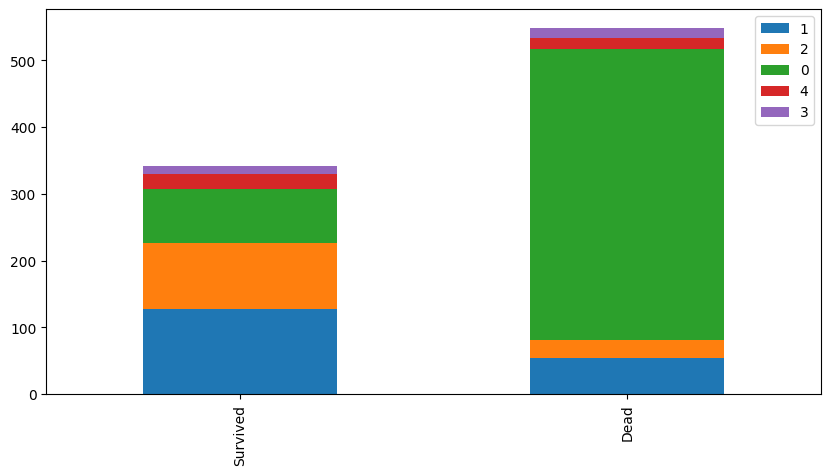

In [749]:
bar_chart('Title')

In [750]:
# 데이터 셋에서 불필요한 feature 삭제
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

---
### 성별
---

In [751]:
# 성별에 숫자 매핑
sex_mapping = {'male': 0, 'female':1}

In [752]:
# 반복문으로 매핑결과 데이터에 적용
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

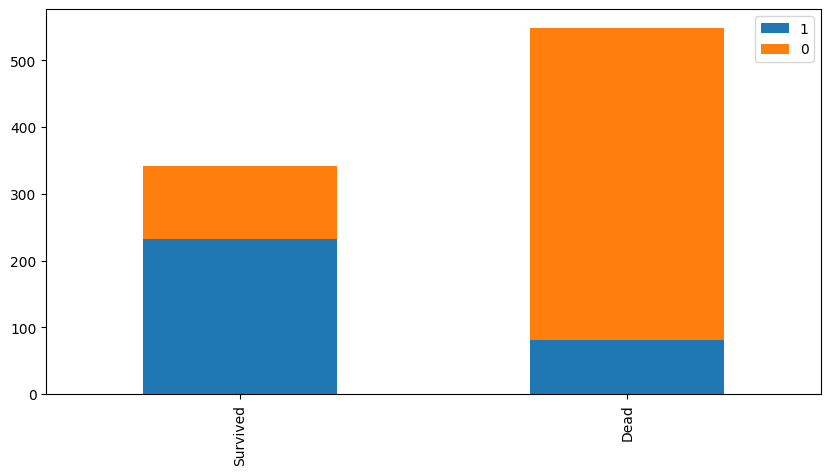

In [753]:
# 그래프로 확인
bar_chart('Sex')

---
## group_size
---

In [754]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [755]:
train.sort_values(by='Ticket')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
504,505,1,1,1,16.0,0,0,110152,86.500,B79,S,1
257,258,1,1,1,30.0,0,0,110152,86.500,B77,S,1
759,760,1,1,1,33.0,0,0,110152,86.500,B77,S,3
262,263,0,1,0,52.0,1,1,110413,79.650,E67,S,0
558,559,1,1,1,39.0,1,1,110413,79.650,E67,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,0,3,1,NaN,0,0,W./C. 6609,7.550,NaN,S,1
92,93,0,1,0,46.0,1,0,W.E.P. 5734,61.175,E31,S,0
219,220,0,2,0,30.0,0,0,W/C 14208,10.500,NaN,S,0
540,541,1,1,1,36.0,0,2,WE/P 5735,71.000,B22,S,1


In [756]:
ticket_unique = train['Ticket'].unique()

In [757]:
for ticket in train['Ticket'].unique():
    train.loc[train['Ticket']==ticket,'group_size'] = len(train[train['Ticket']==ticket])

for ticket in test['Ticket'].unique():
    test.loc[test['Ticket']==ticket,'group_size'] = len(test[test['Ticket']==ticket])

In [758]:
train.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size
886,887,0,2,0,27.0,0,0,211536,13.00,NaN,S,3,1.0
887,888,1,1,1,19.0,0,0,112053,30.00,B42,S,1,1.0
888,889,0,3,1,NaN,1,2,W./C. 6607,23.45,NaN,S,1,2.0
889,890,1,1,0,26.0,0,0,111369,30.00,C148,C,0,1.0
890,891,0,3,0,32.0,0,0,370376,7.75,NaN,Q,0,1.0


In [759]:
train['Fare'] = train['Fare'] / train['group_size']

In [760]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2,1.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1.0
3,4,1,1,1,35.0,1,0,113803,26.5500,C123,S,2,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0,1.0


---
## 나이
***

In [761]:

# # Missing Age를 각 Title에 대한 연령의 중간값으로 대체(Mr, Mrs, Miss, Others)
# # 그룹단위 통계량 추가 transform() - https://rfriend.tistory.com/403

# # train data set
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)

# # test data set
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)


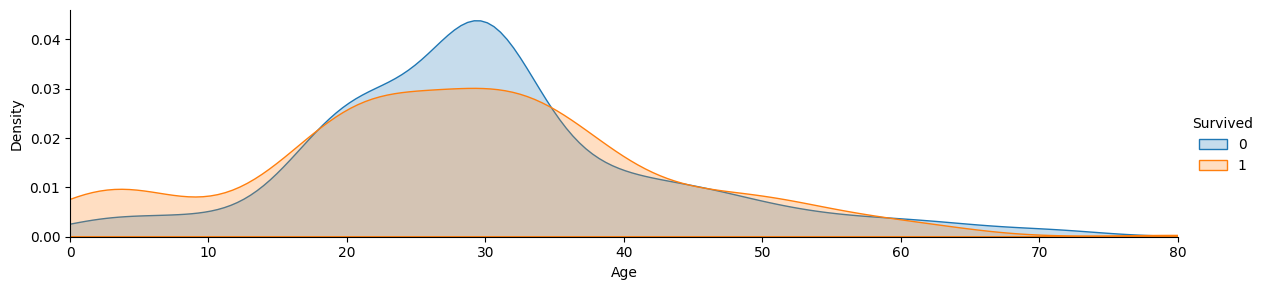

In [762]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()

In [763]:
train_test_data = [train,test]
for train_cp in train_test_data:
    train_cp.loc[train_cp['Age'] <= 16,'Age'] = 0
    train_cp.loc[(train_cp['Age'] > 16) & (train_cp['Age'] <= 26 ),'Age'] = 1
    train_cp.loc[(train_cp['Age'] > 26) & (train_cp['Age'] <= 36 ),'Age'] = 2
    train_cp.loc[(train_cp['Age'] > 36) & (train_cp['Age'] <= 62 ),'Age'] = 3
    train_cp.loc[train_cp['Age'] > 62,'Age'] = 4

train['Age'].value_counts(), test['Age'].value_counts()

(2.0    336
 1.0    255
 3.0    181
 0.0    104
 4.0     15
 Name: Age, dtype: int64,
 2.0    139
 1.0    134
 3.0    100
 0.0     38
 4.0      7
 Name: Age, dtype: int64)

In [764]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0,1.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2,1.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1.0
3,4,1,1,1,2.0,1,0,113803,26.5500,C123,S,2,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0,1.0


In [765]:
# 나이대별 생사여부 확인
survived = train[train['Survived']==1]['Age'].value_counts()
dead = train[train['Survived']==0]['Age'].value_counts()

In [766]:
# 나이대별 생존자 
survived

2.0    116
1.0     97
3.0     69
0.0     57
4.0      3
Name: Age, dtype: int64

In [767]:
train['Embarked'] == 'S'

0       True
1      False
2       True
3       True
4       True
       ...  
886     True
887     True
888     True
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

---
## Embarked
---

In [768]:
# 좌석별 승선 항구 확인하기
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

In [769]:
Pclass1

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [770]:
# DataFrame으로 만들어 인덱스 주기 
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']

In [771]:
# Embarked 정보가 없을 경우 S 항구로 대치
# 반복문으로 전체 자료에 적용
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [772]:
# 머신러닝 Classifier를 위해 텍스트 숫자 변경(매핑)
embarked_mapping = {'S':0, 'C':1, 'Q':2}

# map 함수 사용해서 처리
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [773]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0,1.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2,1.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1.0
3,4,1,1,1,2.0,1,0,113803,26.5500,C123,0,2,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0,1.0


In [774]:
train.groupby('Pclass')['Fare'].median()

Pclass
1    35.2500
2    13.0000
3     7.8542
Name: Fare, dtype: float64

In [775]:
train.groupby('Pclass')['Fare'].mean()

Pclass
1    43.650347
2    13.322599
3     8.085857
Name: Fare, dtype: float64

In [776]:
test.groupby('Pclass')['Fare'].median()

Pclass
1    60.0000
2    15.7500
3     7.8958
Name: Fare, dtype: float64

In [777]:
# 탑승권 가격이 결측값일 경우, 좌석 등급별 중간값으로 대치
# train data set
train["Fare"].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)

# test data set
test["Fare"].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

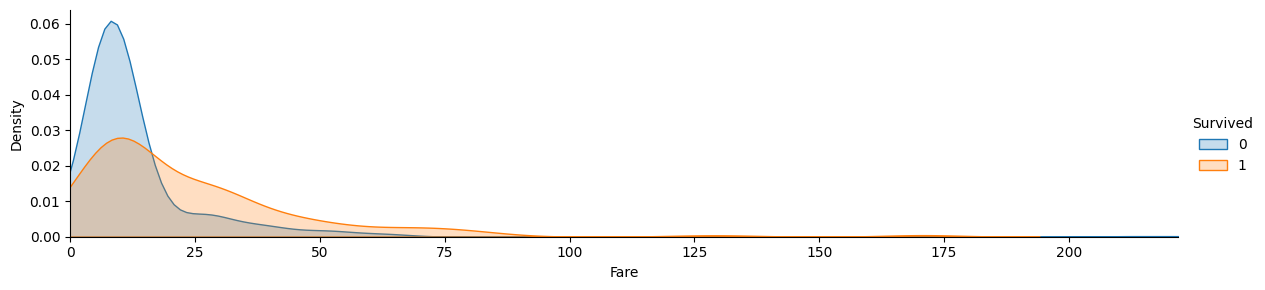

In [778]:
# 시각화
# FacetGrid(data, row, col, hue) : 다중 플롯 그리드를 만들어서 여러가지 쌍 관계를 표현하기 위한 그리드 Class. 도화지에 축을 나누는것과 같음
# Seaborn에서 Multi-plot grid로 조건부 관계를 여러가지를 동시에 플롯팅 할 수 있는 클래스 중 하나

facet = sns.FacetGrid(train, hue="Survived", aspect=4)  # 데이터를 survived로 나누겠다
facet.map(sns.kdeplot, 'Fare', shade=True) # FacetGrid의 객체 facet에 'map'함수를 이용해 어떤 그래프를 그릴 것인지 명시 & 변수명 명시 
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()

(0.0, 40.0)

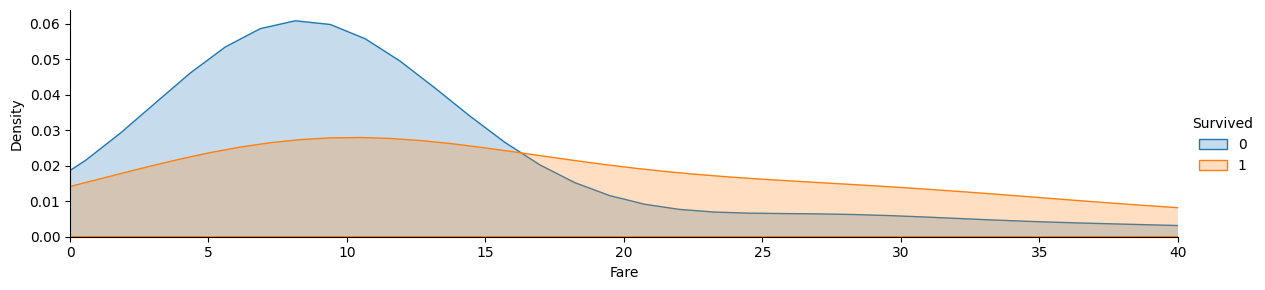

In [779]:
# x축 범위 설정해서 원하는 운임구간의 생존여부 확인
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,40)

In [780]:
train.loc[train['Fare'] <=17 ,'Fare'] = 0
train.loc[(train['Fare'] > 17) & (train['Fare']<= 30 ),'Fare'] = 1
train.loc[(train['Fare'] > 30) & (train['Fare']<= 100 ),'Fare'] = 2
train.loc[train['Fare'] > 100 , 'Fare'] = 3

test.loc[test['Fare'] <=17 ,'Fare'] = 0
test.loc[(test['Fare'] > 17) & (test['Fare']<= 30 ),'Fare'] = 1
test.loc[(test['Fare'] > 30) & (test['Fare']<= 100 ),'Fare'] = 2
test.loc[test['Fare'] > 100 , 'Fare'] = 3

---
## cabin
---

In [781]:
# 반복문을 통해 객실번호의 알파벳과 숫자 분리 후, 알파벳만 뽑아오기
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<AxesSubplot: >

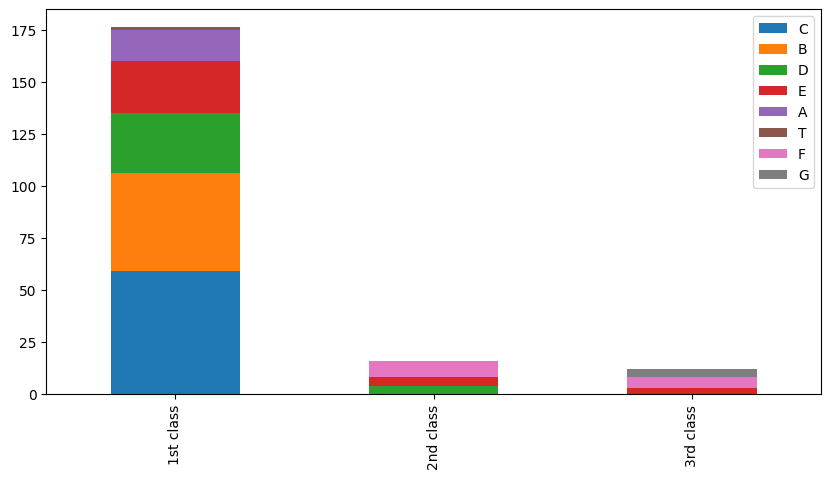

In [782]:
# 클래스별로 객실 종류 count
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']

df.plot(kind='bar', stacked=True, figsize=(10,5))

In [783]:

# classifier를 위해 매핑
# feature scaling : raw data 전처리하는 과정 (feature들의 크기, 범위 정규화)/ 소수점 사용
# 숫자의 범위가 비슷하지 않으면 먼 거리에 있는 데이터를 조금 더 중요하게 생각할 수 있음 주의

cabin_mapping = {'A':0, 'B':0.4, 'C':0.8, 'D':1.2, 'E':1.6, 'F':2, 'G':2.4, 'T': 2.8}

for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [784]:
# Cabin의 missing field는 1등급 2등급 3등급 클래스와 밀접한 관계
# 각 클래스별 cabin의 중간값을 missing value 처리

train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

train.tail(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size
881,882,0,3,0,2.0,0,0,349257,0.0,2.0,0,0,1.0
882,883,0,3,1,1.0,0,0,7552,0.0,2.0,0,1,1.0
883,884,0,2,0,2.0,0,0,C.A./SOTON 34068,0.0,1.8,0,0,1.0
884,885,0,3,0,1.0,0,0,SOTON/OQ 392076,0.0,2.0,0,0,1.0
885,886,0,3,1,3.0,0,5,382652,0.0,2.0,2,2,5.0
886,887,0,2,0,2.0,0,0,211536,0.0,1.8,0,3,1.0
887,888,1,1,1,1.0,0,0,112053,1.0,0.4,0,1,1.0
888,889,0,3,1,1.0,1,2,W./C. 6607,0.0,2.0,0,1,2.0
889,890,1,1,0,1.0,0,0,111369,1.0,0.8,1,0,1.0
890,891,0,3,0,2.0,0,0,370376,0.0,2.0,2,0,1.0


---
## Fsize
---

In [785]:
# 혼자타면 SibSp, Parch 모두 0으로 표시되므로 +1 해주기
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [786]:
# mapping
# feature scaling 
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [787]:
# 불필요한 데이터 삭제 : drop
# Ticket, SibSp, Parch, PassengerId 정보 제거

features_drop = ['Ticket', 'SibSp', 'Parch', 'PassengerId']

train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [788]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,group_size,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,1.0,0.4
1,1,1,1,3.0,2.0,0.8,1,2,1.0,0.4
2,1,3,1,1.0,0.0,2.0,0,1,1.0,0.0
3,1,1,1,2.0,1.0,0.8,0,2,2.0,0.4
4,0,3,0,2.0,0.0,2.0,0,0,1.0,0.0


In [789]:
test.tail(40)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,group_size,FamilySize
378,1,0,3.0,2.0,0.8,0,0,1.0,0.0
379,3,0,0.0,2.0,2.0,0,4,3.0,2.4
380,3,0,2.0,0.0,2.0,2,0,1.0,0.0
381,3,0,1.0,0.0,2.0,2,0,1.0,0.0
382,3,1,3.0,0.0,2.0,0,1,1.0,0.0
383,3,1,1.0,0.0,2.0,0,1,1.0,0.4
384,2,0,2.0,0.0,2.0,0,0,1.0,0.0
385,2,1,1.0,2.0,2.0,0,2,3.0,1.2
386,3,0,1.0,0.0,2.0,0,0,1.0,0.0
387,2,0,3.0,0.0,2.0,0,0,1.0,0.0


In [790]:
# age_null = pd.concat([train[train['Age'].isnull()], test[test['Age'].isnull()]], ignore_index=True)
# age_notnull = pd.concat([train[train['Age'].notnull()], test[test['Age'].notnull()]], ignore_index=True)
# age_notnull

In [791]:
# from sklearn.ensemble import RandomForestClassifier # randomforestclassfier
# from sklearn import metrics # 모델 평가를 위해 사용
# from sklearn.model_selection import train_test_split #

In [792]:
import xgboost as xgb 
from xgboost import XGBClassifier

In [793]:
X_train = train.drop("Survived",axis=1)
Y_train = train["Survived"]
X_test  = test.copy()

In [795]:
test2 = pd.read_csv('../data/test.csv')

In [796]:
Xgboost = XGBClassifier()
Xgboost.fit(X_train, Y_train)
Y_pred = Xgboost.predict(X_test)
Xgboost.score(X_train, Y_train)

submission = pd.DataFrame({
        "PassengerId": test2["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)

In [797]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
# train_age= age_notnull.drop(['Survived','Age'],axis=1)
# target = age_notnull['Age']
# test_age = age_null.drop(['Survived','Age'],axis=1)
# target = age_null['Age']

In [ ]:
# X_train = train_age
# Y_train = age_notnull['Age']
# X_test = test_age.copy()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [ ]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
clf = KNeighborsClassifier(n_neighbors=13) # Knn Model object
scoring = 'accuracy' #평가지표 : 정확도
score = cross_val_score(clf,train_age, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score.mean())

0.4768589743589744


In [ ]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
clf = DecisionTreeClassifier() # Knn Model object
scoring = 'accuracy' #평가지표 : 정확도
score = cross_val_score(clf, train_age, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score.mean())

0.44729853479853476


In [ ]:
# model = RandomForestClassifier()

In [ ]:
# train_age = age_notnull(['Survived', 'Age'], axis = 1)
# target = age_notnull['Age']

In [ ]:
# # 정답과 공부할 문제 분리
# train_data = train.drop('Survived', axis=1)
# target = train['Survived']

In [ ]:
# train_data.shape, target.shape

((891, 9), (891,))

In [ ]:
# model.fit(train_age, target)

RandomForestClassifier()

In [ ]:
# prediction

array([2., 3., 3., 2., 1., 0., 2., 1., 1., 1., 2., 3., 1., 4., 3., 1., 2.,
       1., 2., 3., 3., 0., 3., 1., 3., 3., 1., 1., 3., 2., 3., 1., 2., 3.,
       2., 1., 1., 1., 1., 2., 3., 2., 3., 2., 3., 1., 3., 2., 3., 2., 1.,
       2., 1., 2., 2., 0., 2., 1., 2., 2., 1., 2., 1., 1., 0., 3., 1., 3.,
       2., 3., 1., 1., 2., 2., 2., 2., 2., 3., 2., 1., 0., 4., 3., 2., 2.,
       2., 2., 1., 3., 0., 1., 2., 2., 2., 1., 1., 4., 2., 1., 2., 3., 2.,
       2., 1., 0., 2., 1., 2., 2., 1., 3., 1., 2., 1., 4., 1., 2., 0., 2.,
       2., 0., 2., 2., 2., 2., 1., 1., 1., 3., 1., 2., 3., 3., 2., 3., 1.,
       2., 1., 1., 3., 0., 2., 3., 2., 3., 2., 2., 1., 2., 2., 1., 2., 3.,
       2., 0., 1., 2., 1., 3., 1., 1., 0., 1., 2., 3., 1., 3., 1., 3., 1.,
       2., 2., 1., 2., 3., 0., 1., 3., 2., 3., 2., 3., 1., 2., 2., 3., 1.,
       1., 1., 3., 2., 2., 0., 3., 0., 2., 0., 1., 1., 3., 1., 0., 3., 0.,
       1., 2., 2., 1., 2., 1., 2., 2., 1., 3., 3., 3., 1., 3., 3., 2., 2.,
       1., 1., 1., 3., 3.

In [ ]:
# train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,group_size,FamilySize
0,3,0,1.0,0.0,2.0,0,0,1.0,0.4
1,1,1,3.0,2.0,0.8,1,2,1.0,0.4
2,3,1,1.0,0.0,2.0,0,1,1.0,0.0
3,1,1,2.0,1.0,0.8,0,2,2.0,0.4
4,3,0,2.0,0.0,2.0,0,0,1.0,0.0
5,3,0,NaN,0.0,2.0,2,0,1.0,0.0
6,1,0,3.0,2.0,1.6,0,0,1.0,0.0
7,3,0,0.0,0.0,2.0,0,4,4.0,1.6
8,3,1,2.0,0.0,2.0,0,2,3.0,0.8
9,2,1,0.0,0.0,1.8,1,2,2.0,0.4


In [ ]:
# # train - Title의 결측값 채우기
# train_data['Title'] = train['Title'].fillna(0)

In [ ]:
# # 훈련: model에 fit 시키기
# model.fit(train_data, target)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# 예측
# prediction = model.predict(test)

In [ ]:
# prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# # 정확도 측정
# accuracy = round(model.score(train_data, target) * 100, 2)
# print("Accuracy : ", accuracy, "%")

Accuracy :  91.25 %


In [ ]:
# test2 = pd.read_csv('../data/test.csv')

In [ ]:
# submission = pd.DataFrame(
#     {
#         "PassengerId":test2["PassengerId"], # 앞에서 PassendgerId 삭제했으므로 다시 불러 옴
#         "Survived":prediction
#     }
# )
# submission.to_csv('titanic1111.csv', index=False)

In [ ]:
# submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
